In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

In [4]:
news = ['Executive Order/Public Health Order \n (stay home unless essentials)', 
             'Modified Exec Order/Public Health Order', 'Limited Stay Home Order', 
             'Regional Stay Home Order\n (<15% ICU capacity)', 'LSHO \n extended', 'RSHO/LSHO\n lifted']

dates = ['2020-03-19', '2020-05-04', '2020-11-21', '2020-12-03',
             '2020-12-22', '2021-01-25']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

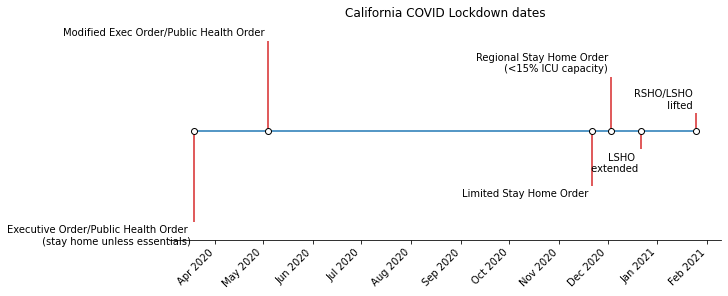

In [15]:
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
ax.set(title="California COVID Lockdown dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="C0-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

lines = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, n, va in zip(dates, levels, news, lines):
    ax.annotate(n, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html